# What is Gap-strategy : 
### Gap strategy actually also called as length-wise iteration ,
### in this strategy instead of traversing(iteratively) row-wise in the dp_table and filling-up values/solution of overlapping subproblems here we traverse(iteratively) diagonally in the dp_table.
### the longest diagonal possible on dp_table has such states i.e. (0,0) ,(1,1), (2,2) etc if i denotes row and j denotes colmn of dp_tble 
### the length of each cells on longest-diagonal possible on dp_table is 1 only   and length of each cell on further relatively small-diagonals will be 2,3,4 and 5 [as you can see on diagram below]
### similarly gap (or we can say difference b/w i & j) of each cells on longest-diagonal possible on dp_table is 0 (as 0-0= 0 ; 1-1=0 ; 2-2 = 0 etc ) and gap of each cell on further relatively small-diagonals will be 1,2,3 and 4.

# Palindromic Substrings problem question and clarifying question:
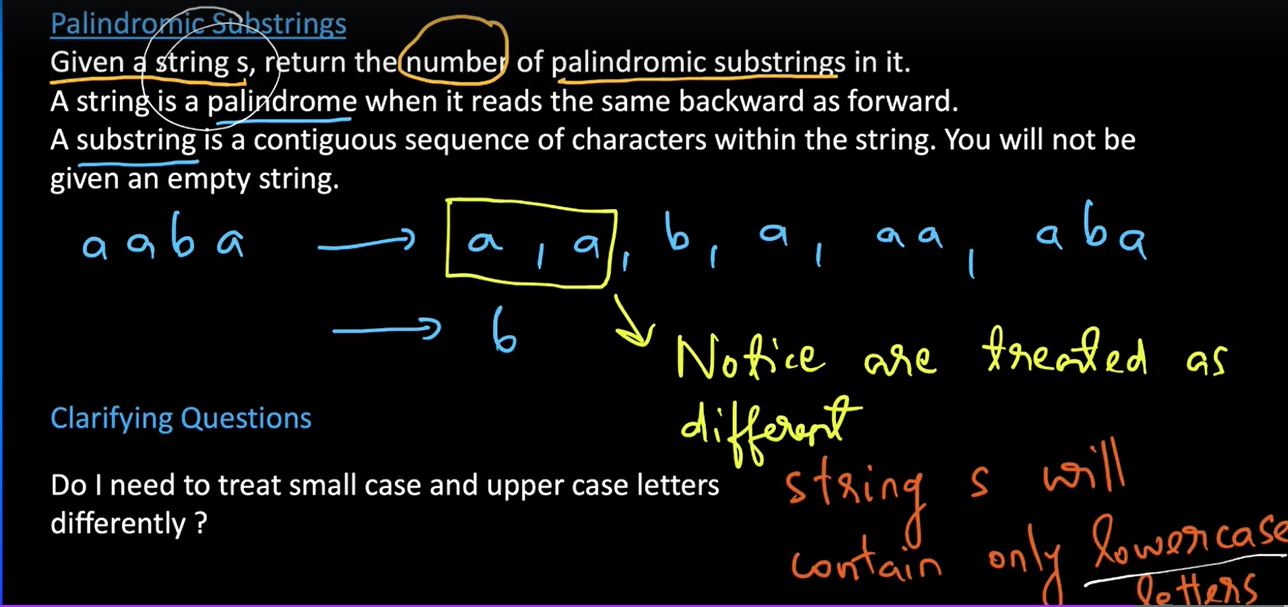
# Palindromic Substrings problem test-cases:

# Palindromic Substrings problem statement:
### Palindromic Substrings:-
### Given a string s, return the number of palindromic substrings in it.

### A string is a palindrome when it reads the same backward as forward.

### A substring is a contiguous sequence of characters within the string.
- As we can't delete characters in between the chars while forming sub-string like we used to do in the case of common-subsequnece  
### Example 1:
- Input: s = "pqrp"
- Output: 4
- Explanation: Three palindromic strings: "p", "q", "r","p".

# Palindromic Substrings problem (how thos problem  has DP-features?):


# Palindromic Substrings problem Recursion & memoisation(top-down) approach:
### Approach intuition :
### here we check the chars at first and last-index (chars ar i and j) if they're equal (if s[i]==s[j] then return True) and alongwith that, we check further for chars in between these equal chars are also pallindrome or not if they're pallindrome then return True else return false (recursvie(i+1,j-1) -> T/F)  
### here we make recursive-check for pallindromic-substring like this :
### A). by making i-index constant and j-index descreasing (i,j-1) 
### b). by making i-index increasing and j-index constant (i+1,j)  
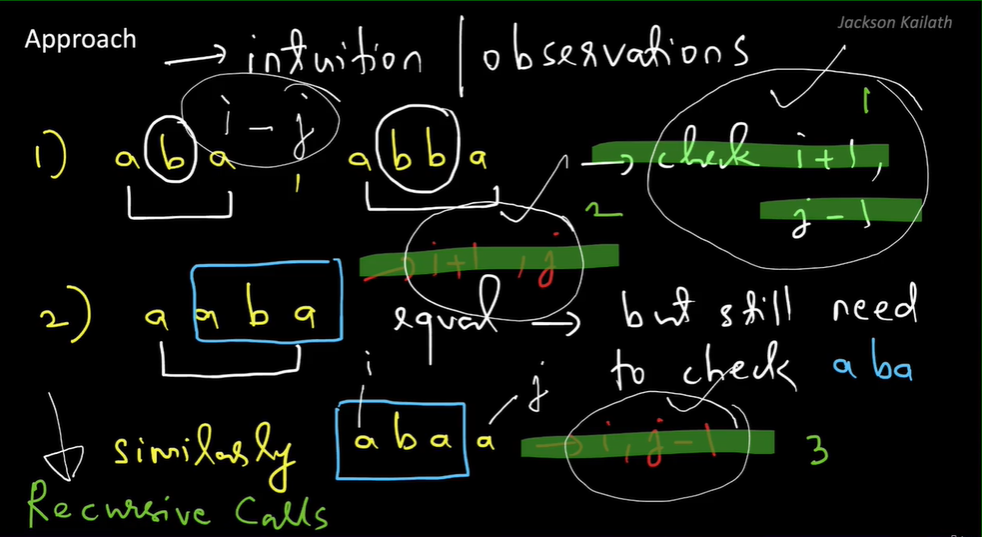
### As there will be some cases where there're adjacent characters which's equal to each other (s[i] = s[j]) but there is no char in between these equal chars to check further for pallindromic-substring (as they're alrerady adjacent-equal ; j=i+1) , this case can be used in base-cases alongwith base-case like (j<i // i & j crosses each other or not ) [but here this case of adjacent-equal we'll handle saperately in the code with 'OR' operator with condition (recursvie(i+1,j-1) -> T/F)]
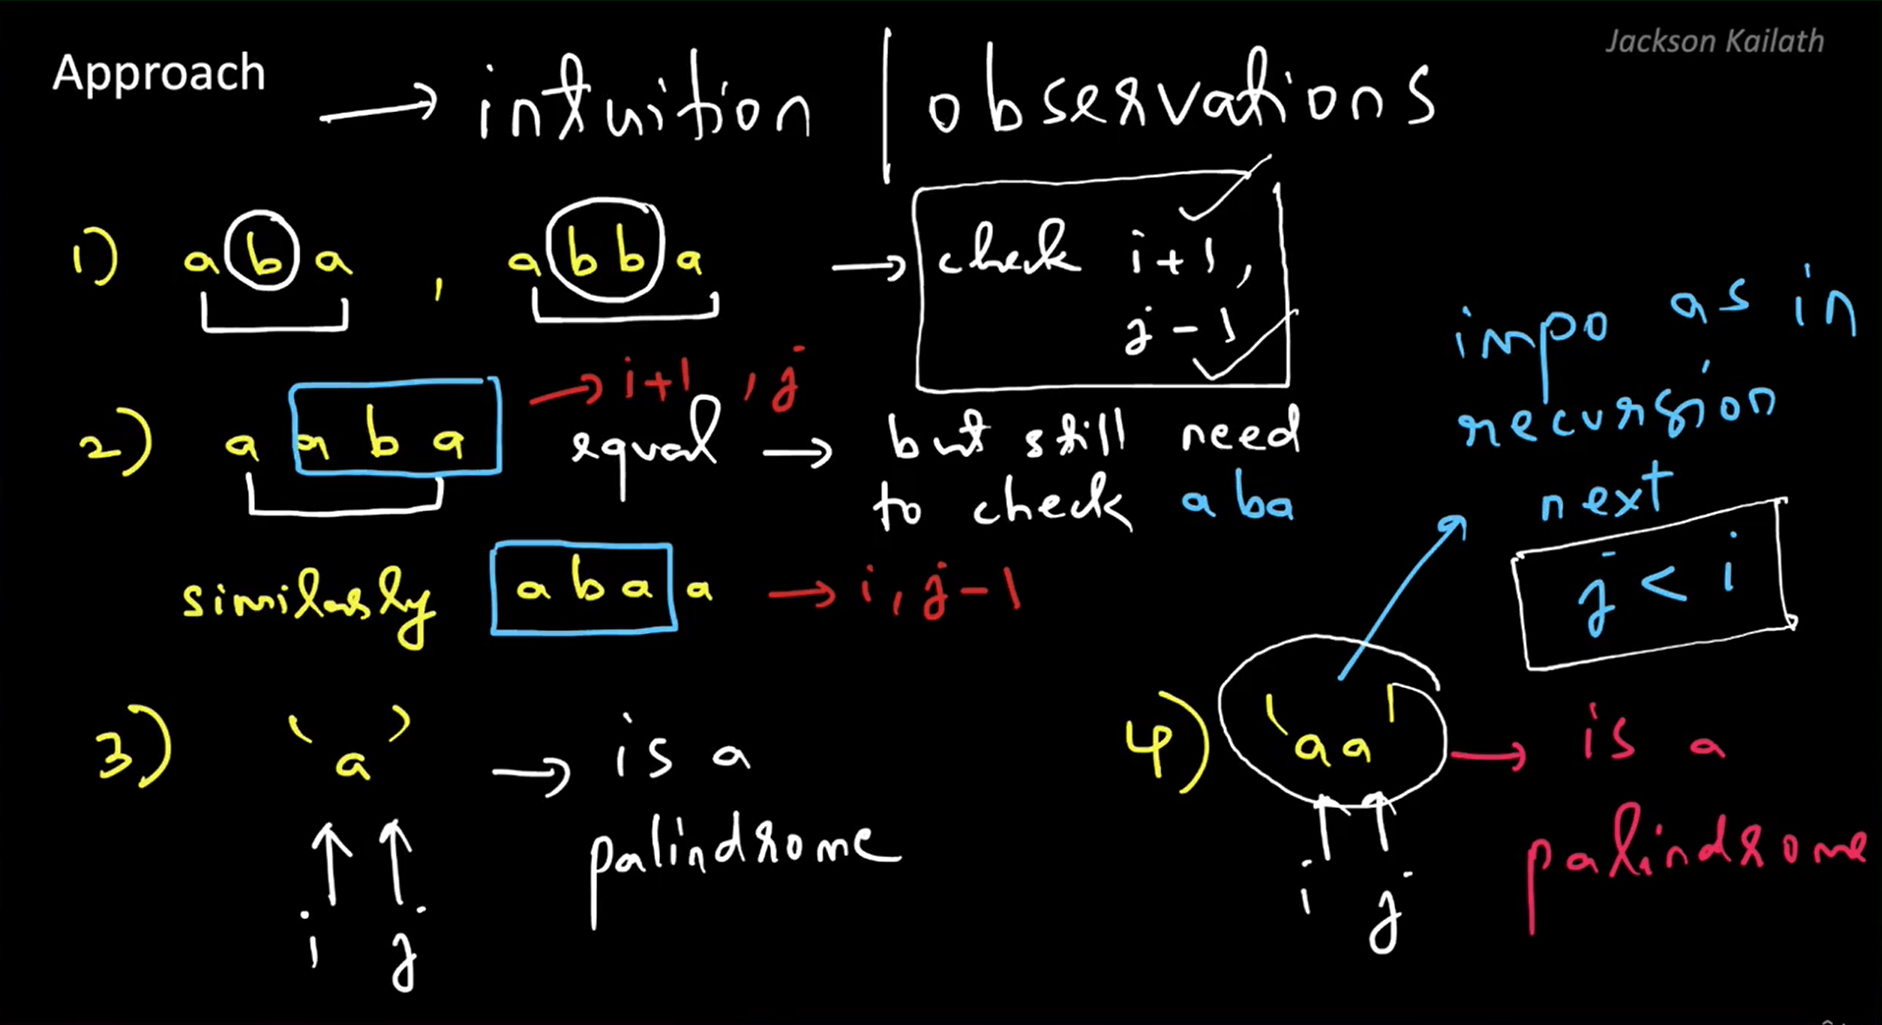
### Brute-force (complexity):
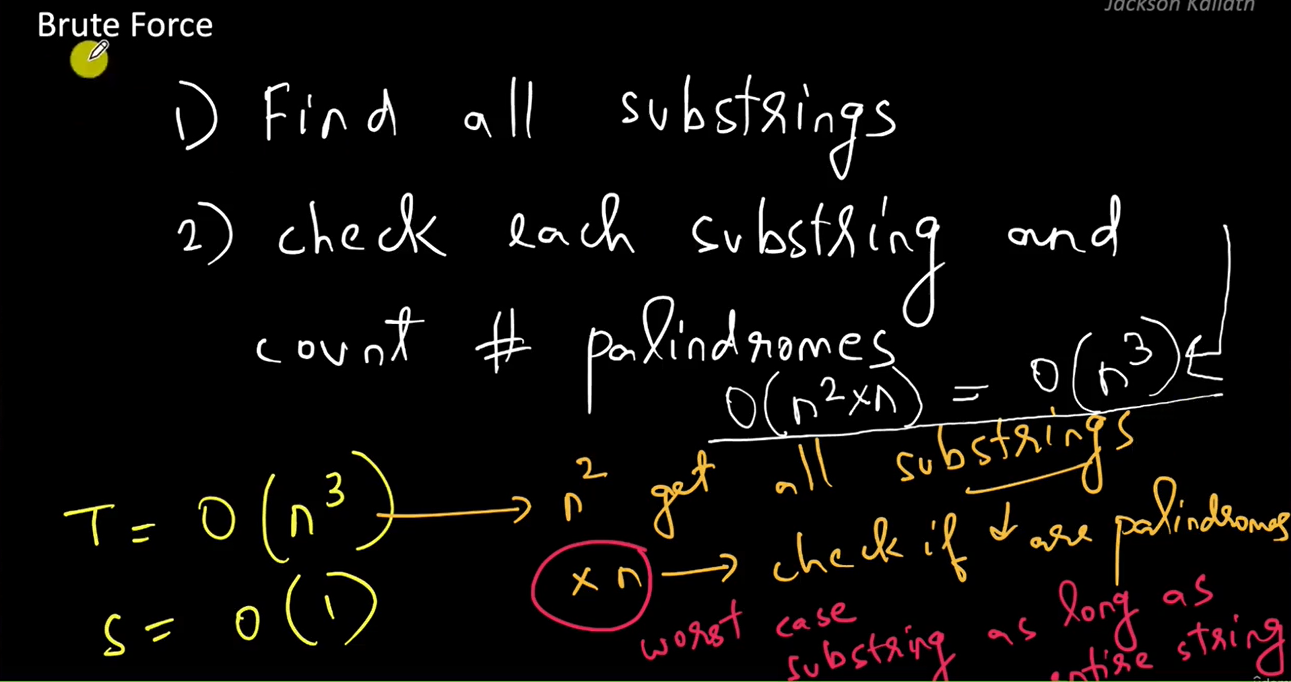
### here this cell is denoting the subproblem where substring at hand is 'qpr' [as this is sub-string from i to j (1 to 3) at string 'p q p r p s']
### and at each of these cell representing subproblem of substring at hand ;we check whether it's pallindromic substring or not 
### based on that correspondignly store T/F values in the dp_table repectively  


### recursive-steps to fill-up cells at corresponding indexes(i,j) with T/f :


### This is how our recursive_pallindromic check function look-like (psedo-code):
### i index intitalised with zero '0' whereas j index initialised to len-1 (n-1)  
### base-cases are : 
1. j < i //when j crosses i  or i and j crosses each other  return False .
2. j = i // if j=i ; means there's only one char as sub-string ; so that will be pallindrome certainly , so we return True.   
### Recursive-steps [as we discussed above as well]:
1. recursive_palliderome(i, j-1)   //remaining i constant & decreasing j 
2. recursive_palliderome(i+1, j)  //increasing i & remaining j constant 

3. (if S[i]==s[j])  //if first and last chars of current sub-string equal   
                        AND
   (if j= i+1 ) // adjacent-equal case (so no need to further pallindromic-check for chars in-between)  --OR-- ( recursive_pallindrome(i+1,j-1) //cheking further for pallindromic-check for chars in-between these two equal-char )                         

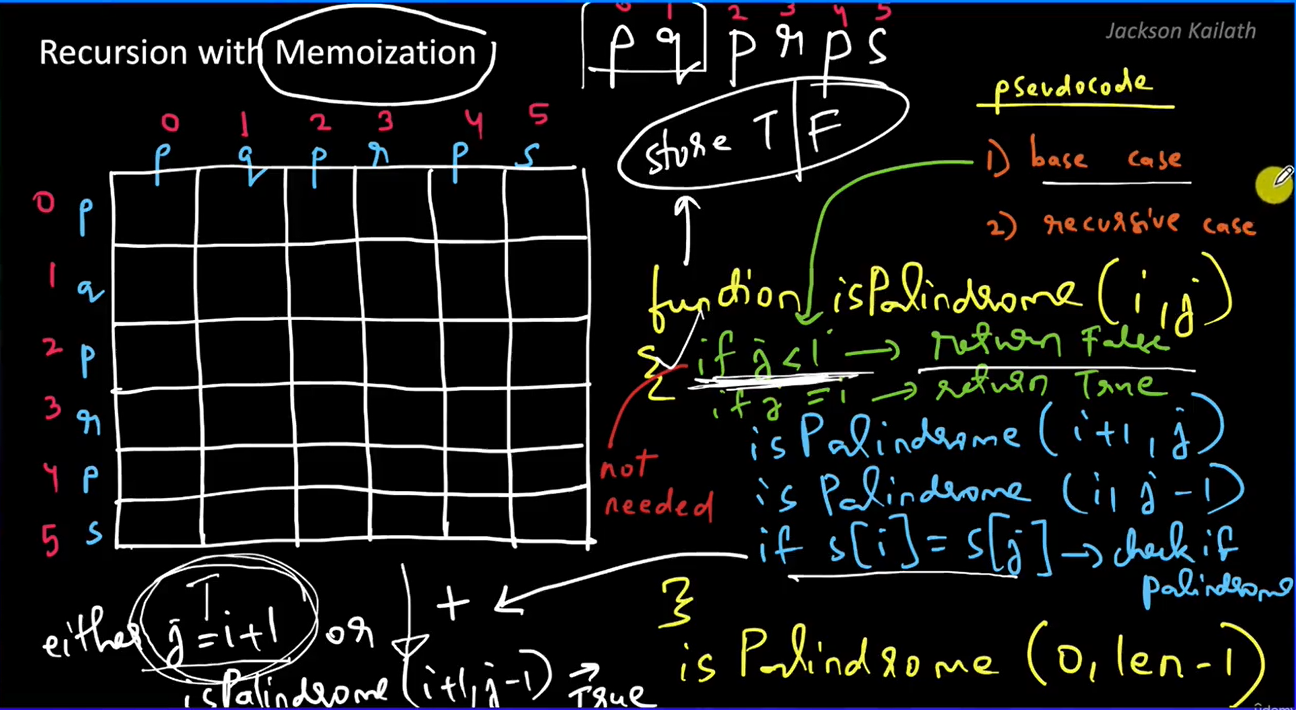

### recursive-tree for pallindormic-check of sub-string:  [through which we fill T/F as solution to the respecitve subproblems in dp_table] : 
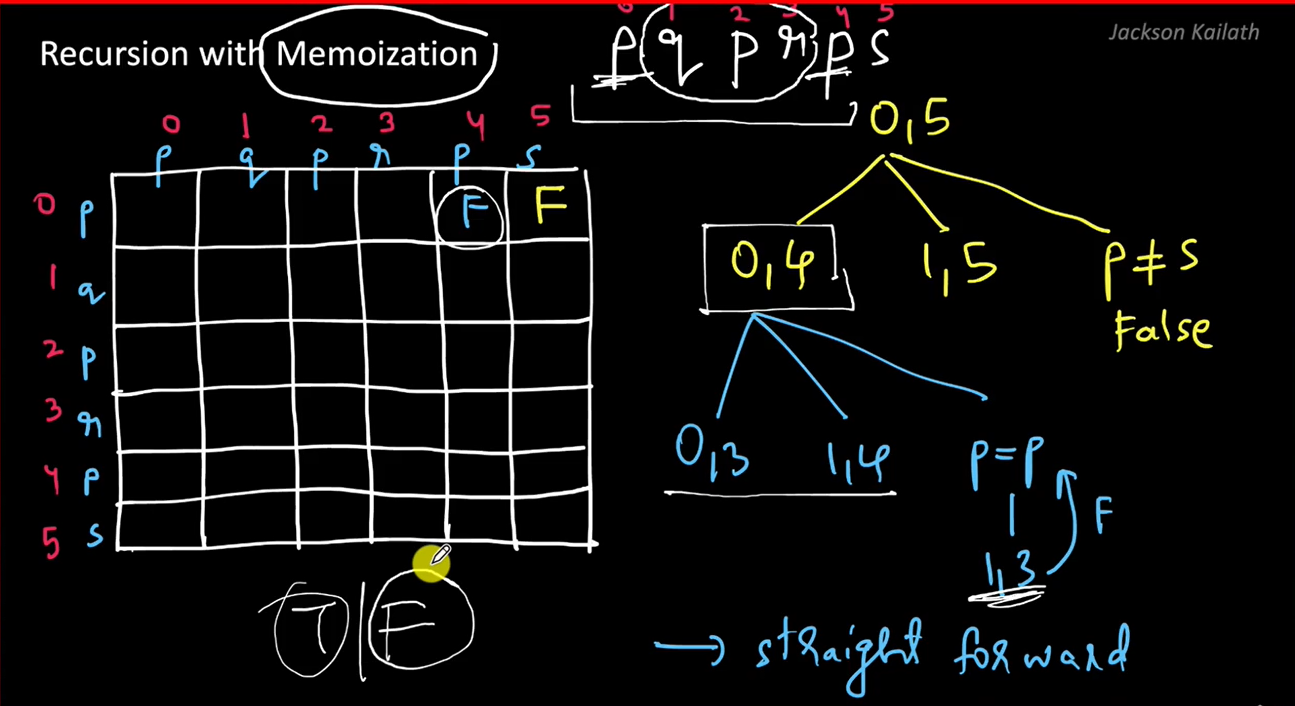
### This is how we fill the T/F values in the dp_table
- note: here not-meaningful state are dead-states where all cells will hold False values certainly becuse its the base-case where j < i 
- we're not going to considered this dead-states in the length-wise iteration(gap-strategy) for counting number of 'Trues' or 'Ts' as that will gives us total number of pallindromic-substring possible for given orignal-string.     

### this length-wise itertation or diagonal-iteration(gap-strategy) will be same in tabulation approach as well:
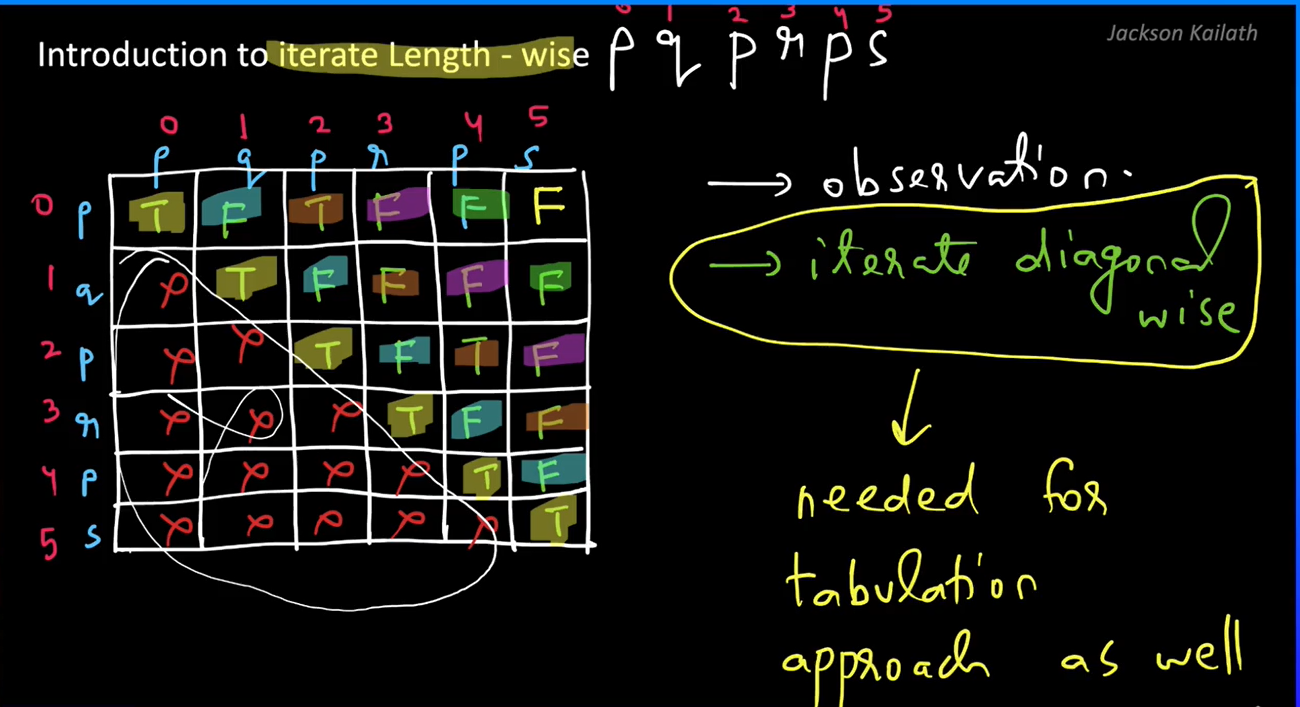

### for length-iteration or diagonal iteration ; as we know longest diagonal on dp_table has length equals to 1 as ((0,0), (1,1) etc where substring from 1 to j has length 1 possible only), further smaller diagonals have length 2,3,4,5 and 6

### so length 'L' will go from 1 upto n
### whereas i will go from 0 upto n-L ; simultaneously for every instance of i, j will be equal to i + L - 1    


# Palindromic Substrings problem Recursion & memoisation(top-down) approach [complexity analysis]:
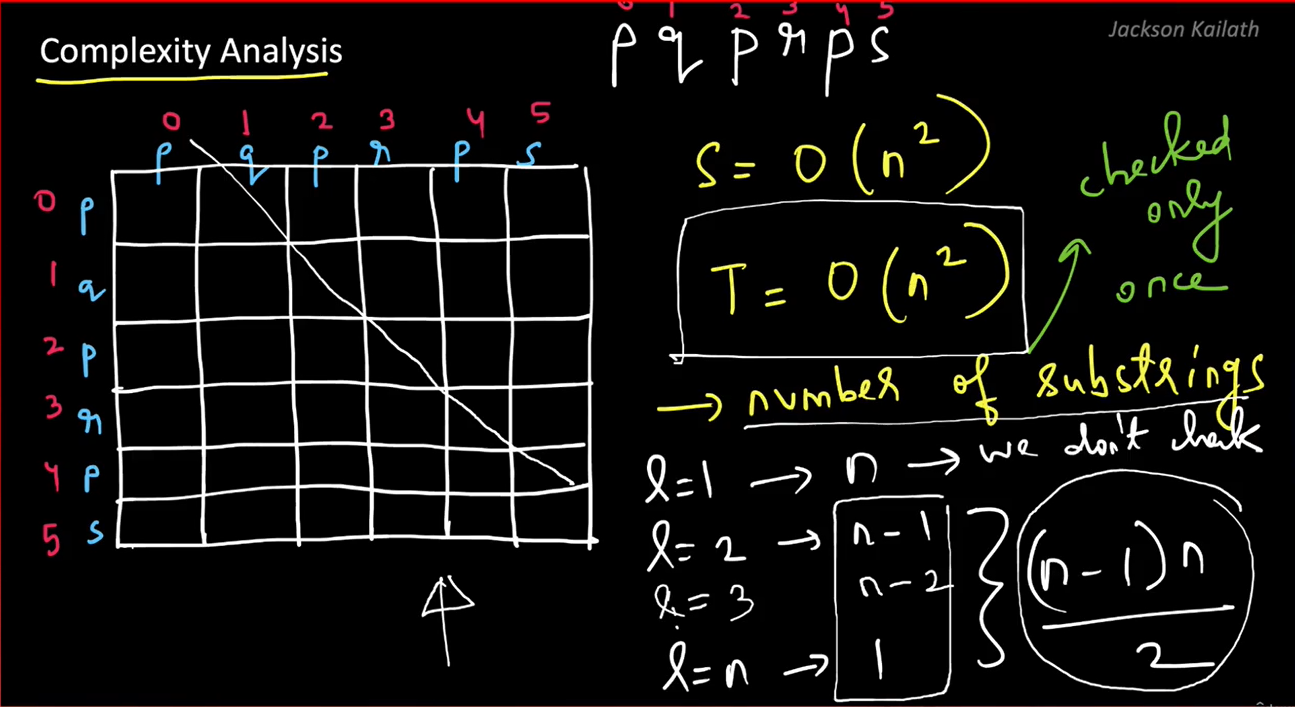
# Palindromic Substrings problem Recursion & memoisation(top-down) approach [code-implementation]:
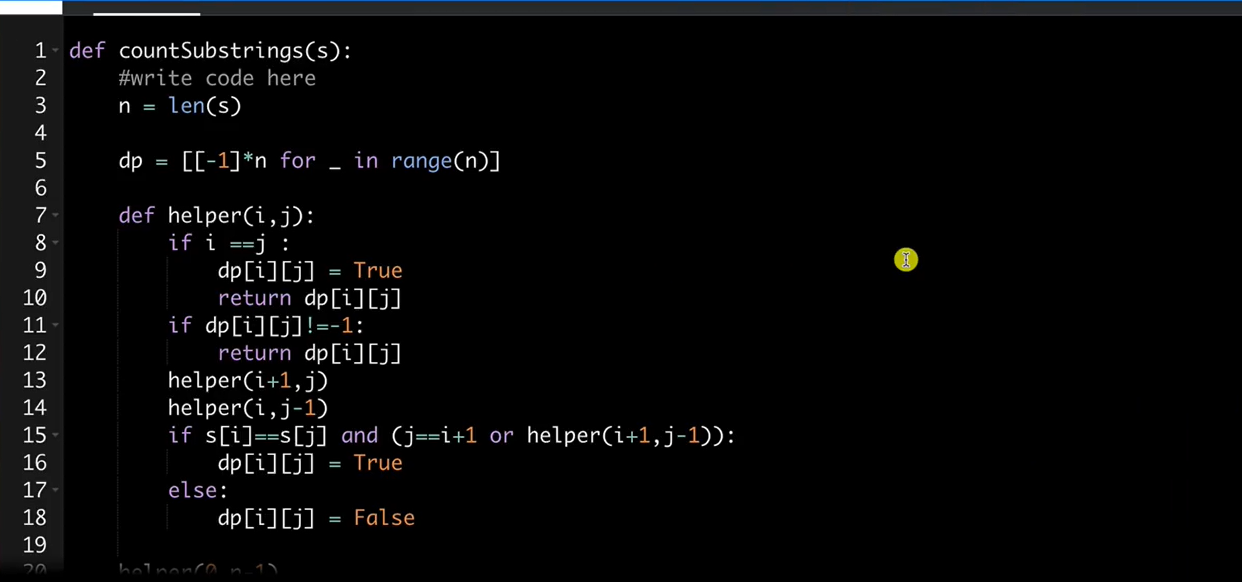
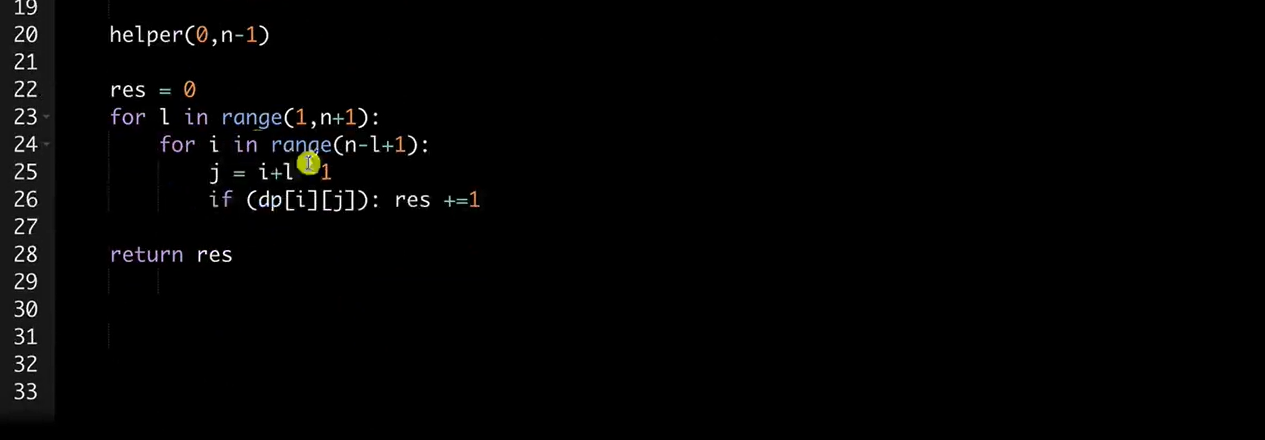

In [4]:
# Palindromic Substrings problem Recursion & memoisation(top-down) approach [code-implementation]:
def countSubstrings(s):   # this function specifically used to count total number of pallindromic substring possible  for given original string
    n = len(s) # length of given string 
    dp = [[-1]*n for _ in range(n)]  #2-d dp_table we construct of dimesnion (n*n)  intialised all cells with -1

    def recursive_pallindrome(i,j):  # this recursive fn will take i and j indexes as arguments
        #base-cases:
        if j<i:  # if j and i crosses each other 
            dp[i][j]=False
            return dp[i][j]
        if i==j:  # when i=j means there's only one char as substring ;as i and j both pointing the same char  
            dp[i][j]=True   # then that will be certainly considered as pallindrome ; so return True
            return dp[i][j]

        if dp[i][j]!= -1:  # now checking whether solution already existed , if exited (dp[i][j]!=-1) is True then return the solution from corresponding index at dp_table. 
            return dp[i][j]    
        #recursive-steps:
        recursive_pallindrome(i+1,j) # i increasing and j remaining constant 
        recursive_pallindrome(i,j-1)# i reamining constant and j decreasing 
        #checking first and last chars of curr-substring is equal then further check for chars in-betwwen these equal chars whether they're pallindromic substring or not (recursive_pallindrome(i+1,j-1))
        # if its the case of adjacent equal chars (j==i+1) then no need to check pallindromic substring for further chars in-between.   
        if s[i]==s[j] and (j==i+1 or recursive_pallindrome(i+1,j-1)):
            dp[i][j] = True
        else:  
            dp[i][j] = False   
        return dp[i][j]     
    recursive_pallindrome(0,n-1)  # this recursive function intialised with i index eqials to 0 and j index equals to last (n-1)

    #count the number of times we have True in dp : its also equal to total numbers of pallindromic substring possible for given original-string
    # for this here we count through length-iteration or diagonal-iteration (gap-strategy)
    max = 0
    for l in range(1,n+1):  # length from 1 upto n
        for i in range(n-l+1):   # i from 0 to n-l
            j = i+l - 1   # for each instance of i; j = i+l -1 
            if dp[i][j] ==True:  # if value encountered at corresponding index of dp_table is True
                max+=1   # then increament max
    return max   # return total numbers of true values in  the dp_table          
#
string = 'pqprps'
print(countSubstrings(string)) # should be  8  
st= 'abbabb'
print(countSubstrings(st)) # should be  11

8
11


In [5]:
def countSubstrings(s):
    n = len(s)
    dp = [[-1]*n for _ in range(n)]

    def helper(i,j):
        if i==j:
            dp[i][j]=True
            return dp[i][j]

        if dp[i][j]!= -1:
            return dp[i][j]    
        helper(i+1,j)
        helper(i,j-1)
        if s[i]==s[j] and (j==i+1 or helper(i+1,j-1)):
            dp[i][j] = True
        else:
            dp[i][j] = False   
        return dp[i][j]     
    helper(0,n-1)

    #count the number of times we have True in dp
    res = 0
    for l in range(1,n+1):
        for i in range(n-l+1):
            j = i+l - 1   
            if dp[i][j] ==True:
                res+=1
    return res            